# Learn & Share
### Language Model from Ground Up in Pytorch

## Agenda

- Brief about baby language model.
- Transformer - 101
- Building Blocks of different LLM's (Code Walkthrough/Benchmarking)
- Implementation details of BLM
- Setup for experimentation
- Experiments wit finetuned BLM

## Motivation

This project focuses on learning and implementing various aspects of transformer architecture, particularly tailored towards building small, efficient language models suitable for low-end consumer-grade devices. The goal is to understand and create minimalist language models with fewer than 20 million parameters, optimized for specific tasks.
The trained SLMs appear to be substantially more interpretable than larger ones.


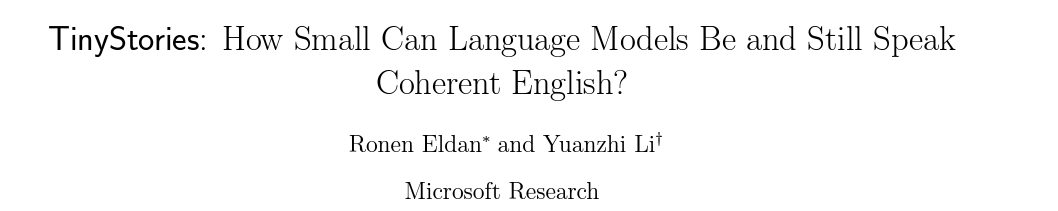
https://arxiv.org/abs/2305.07759

- Models with around 125M parameters such as GPTNeo (small) [3] or GPT-2 (small) [23] can rarely generate coherent and consistent English text beyond a few words even after extensive training. This raises the question of whether the emergence of the ability to produce coherent English text only occurs at larger scales

- Dataset : They have introduce TinyStories, a synthetic dataset of short stories that only contain words that a typical 3 to 4 class student usually understand, generated by GPT-3.5 and GPT-4.

- Prompt : Write a short story (3-5 paragraphs) which only uses very simple words that a 3 year old child would likely understand. The story should use the verb ”decorate”, the noun ”thunder” and the adjective ”ancient”. The story should have the following features: the story should contain at least one dialogue, the story has a bad ending. Remember to only use simple words!

In [9]:
from src.inference.blm_generate import predict

input_text = "Jack was hungry, so he went looking for"
predict(input_text)

Jack was hungry, so he went looking for something to eat. He looked in the kitchen and saw a big pot of soup. Jack was so excited, he wanted to try it! He grabbed a spoon and took a big spoonful of soup. It was so yummy!

Jack wanted to share it with his friends, so he ran to find them. He found his best friend, Sam. "Hey Sam, look! I have soup. Do you want to try it?" asked Jack.

Sam was so happy to see Jack's soup. He grabbed a spoon and started to eat the soup. He liked it so much! He ate all of the soup and asked for more.

Jack and Sam ate the soup together. They had so much fun eating it. Jack was happy to share the soup with his best friend. They both enjoyed it very much.

The end.




In [15]:
input_text = (
    "Lily wanted to get either a cat or a dog. Her mother didn’t let her get a dog so instead she"
)
for _ in range(3):
    print("==" * 30)
    predict(input_text)

Lily wanted to get either a cat or a dog. Her mother didn’t let her get a dog so instead she decided to get a cat. She was so excited! 

Lily ran to the store and saw a big cat. It was so cute! She asked her mother if she could buy it and her mother said yes. 

Lily was so happy! She took the cat home and named it Fluffy. She played with Fluffy all day and even took it for a nap.

At night, Lily and Fluffy were very tired. They snuggled up together in bed and soon fell asleep. Lily was so happy to have her new friend.

The next morning, Lily and Fluffy were ready to go out and play again. They ran and played together until it was time for Lily to go to school. She was so happy to have a new friend. 

The end.


Lily wanted to get either a cat or a dog. Her mother didn’t let her get a dog so instead she decided to go to the pet store. She was so excited! When she arrived she saw a big, furry cat and a big, black dog.

Lily asked, "Can I get one too?"

The pet store keeper said, "Yes, bu

In [37]:
text = "Tom and Jane are friends. One day, Jane goes to Tom’s house. Tom has a big pot of soup. He wants to share it with Jane. “Jane, do you want some soup?” Tom asks. “Yes, please. It looks yummy,” Jane says. Tom pours some soup into two bowls. He gives one bowl to Jane. Jane takes a spoonful of soup, but then she makes a face. The soup is"
print(text)

Tom and Jane are friends. One day, Jane goes to Tom’s house. Tom has a big pot of soup. He wants to share it with Jane. “Jane, do you want some soup?” Tom asks. “Yes, please. It looks yummy,” Jane says. Tom pours some soup into two bowls. He gives one bowl to Jane. Jane takes a spoonful of soup, but then she makes a face. The soup is


In [42]:
for _ in range(2):
    print("==" * 30)
    predict(text, temperature=1.1)

Tom and Jane are friends. One day, Jane goes to Tom’s house. Tom has a big pot of soup. He wants to share it with Jane. “Jane, do you want some soup?” Tom asks. “Yes, please. It looks yummy,” Jane says. Tom pours some soup into two bowls. He gives one bowl to Jane. Jane takes a spoonful of soup, but then she makes a face. The soup is too spicy! Jane's face turns red and she feels sad. She does not want Tom's soup anymore. Tom feels bad. He wants his soup to be spicy too. He thinks of a plan to make the soup less spicy. He pours a big glass of cold water into the pot. Then he gives Jane some soup. She drinks it and smiles again. She says, "Thank you, Tom. This is much better." Tom is happy. He likes to see Jane smile.


Tom and Jane are friends. One day, Jane goes to Tom’s house. Tom has a big pot of soup. He wants to share it with Jane. “Jane, do you want some soup?” Tom asks. “Yes, please. It looks yummy,” Jane says. Tom pours some soup into two bowls. He gives one bowl to Jane. Jane 

- However, it is not clear at what scale these abilities emerge, and how they depend on the model architecture and the data distribution.

- When we train a model on Wikipedia, for example, we are not only teaching it how to speak English, but also how to encode and retrieve an immense amount of facts and concepts from various domains and disciplines. Could it be that SLMs are overwhelmed by the amount and variety of information they have to process and store, and that this hinders their ability to learn the core mechanisms and principles of language

### Key Findings 
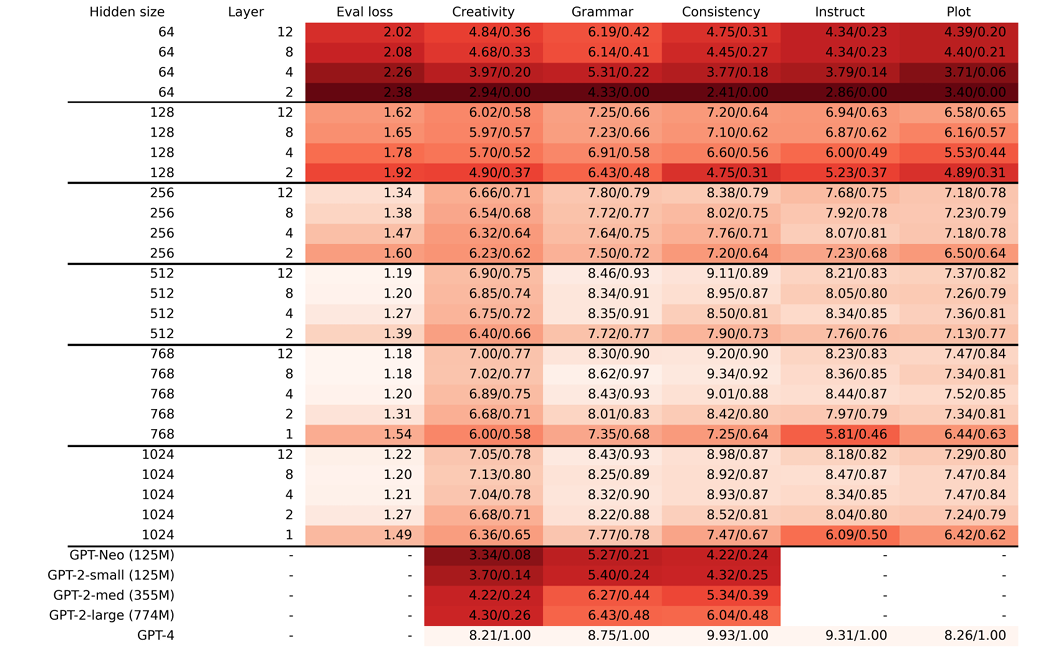

-  We observe that the score for grammar plateaus at an earlier stage than the other two scores. Furthermore, we also see that while grammar can be mastered by relatively small models, consistency and creativity only emerge at a larger size.
-  The ability to generate a completion that is consistent with the beginning of the story emerges when the hidden size of the model increases from 64 to 128
- The largest model that they have trained on TinyStories (with roughly 80M parameters) reaches almost perfect scores in terms of grammar and consistency. However, it falls short of GPT-4’s abilities in terms of creativity quite significantly, suggesting that creativity continues to improve more substantially with the sizes of the model and dataset, compared to grammar and consistency.